In [ ]:
# Setup
!pip install opencv-contrib-python

In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [80]:
def display_mat(mat,title='temp', cmap='hsv'):
    vmin = None
    vmax = None
    if cmap == 'gray':
        vmin=0
        vmax=255
    plt.imshow(mat, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.show()

In [2]:
img_data = "../data/unstructured_data/740px-Chrome-standing-2yr-old.png"

# Load Image

In [3]:
img = Image.open(img_data)

__Preview Image__

Image width 740, img height 720
Image mode: RGBA



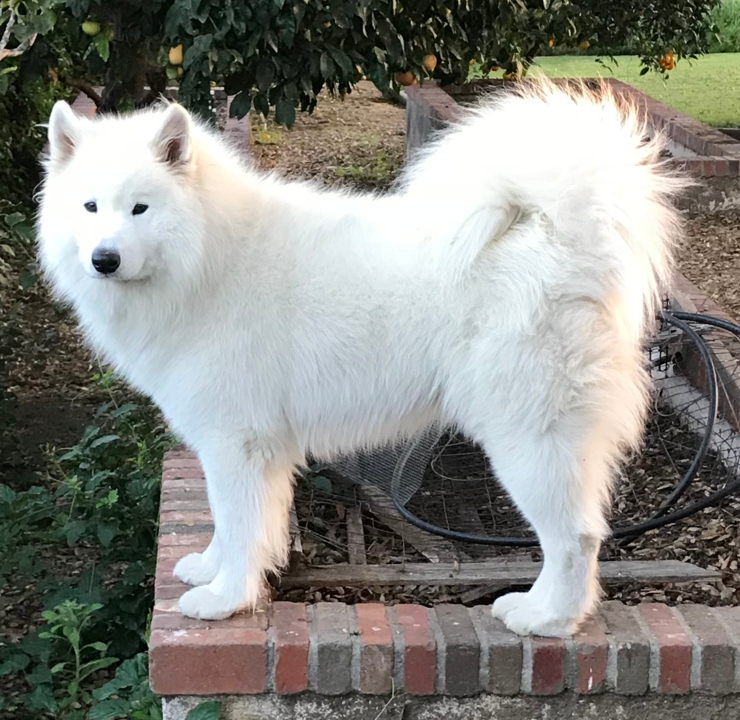

In [4]:
print("Image width %d, img height %d" % img.size)
print("Image mode: %s\n" % img.mode)

img

# Image Representations

How to present images to ML/DL algorithms or to code to 'see'?


In [10]:
img_array = np.array(img)

img_array

array([[[ 17,  22,   4, 255],
        [ 55,  62,  40, 255],
        [ 77,  85,  58, 255],
        ...,
        [145, 183, 118, 255],
        [152, 189, 123, 255],
        [162, 197, 132, 255]],

       [[ 44,  47,  24, 255],
        [ 98, 104,  75, 255],
        [ 99, 107,  70, 255],
        ...,
        [130, 168, 102, 255],
        [145, 183, 117, 255],
        [151, 189, 123, 255]],

       [[ 91,  94,  67, 255],
        [138, 144, 108, 255],
        [125, 133,  89, 255],
        ...,
        [115, 153,  87, 255],
        [132, 171, 105, 255],
        [137, 175, 109, 255]],

       ...,

       [[ 52,  57,  50, 255],
        [ 46,  50,  43, 255],
        [ 37,  41,  35, 255],
        ...,
        [ 82,  78,  72, 255],
        [ 68,  64,  58, 255],
        [ 58,  54,  48, 255]],

       [[ 26,  32,  26, 255],
        [ 22,  28,  21, 255],
        [ 20,  26,  19, 255],
        ...,
        [ 70,  66,  60, 255],
        [ 77,  73,  67, 255],
        [ 74,  70,  64, 255]],

       [[ 17

In [11]:
print(img_array.shape)

(720, 740, 4)


You can see that the image is height, width, 4 colour channels -> 3D Matrix.

Each colour channels contains pixel intensity of that particular colour for each pixel in the image.

In this example:

0 -> R

1 -> G

2 -> B

3 -> A

__Question__: Why is there an Alpha channel?

Let's get rid of the alpha channel

In [29]:
img_rgb_arr = img_array[:,:,:-1].copy()

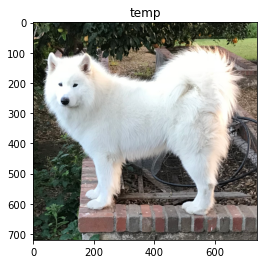

In [81]:
display_mat(img_rgb_arr)

Let's try maximising the pixel intensity of the red channel

In [43]:
# Create a matrix with 720, 740 pixels filled with 255
dim = img_array.shape[:-1]
max_pixel_intensity = np.empty(dim,)
max_pixel_intensity.fill(255)
print(max_pixel_intensity)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [46]:
img_temp = img_rgb_arr.copy()

# Replace red channel with max intensity matrix
img_temp[:,:,0] = max_pixel_intensity

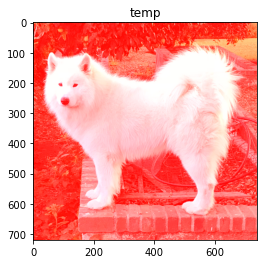

In [82]:
display_mat(img_temp)

## Colour spaces

A colour space is a specific organization of colors.
A "coulor model" is an abstract mathematical model describing the way coulors can be represented as tuples of numbers (e.g. triples in RGB or quadruples in CMYK)

To demonstrate this visually, we'll be introducing a computer vision library called OpenCV

In [47]:
# Lets read using opencv
img_cv = cv2.imread(img_data)

Let's plot the image read by cv2 vs the one read by PIL.Image

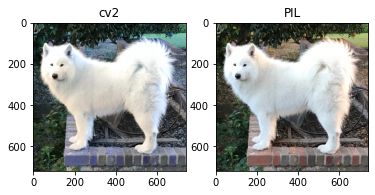

In [55]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_cv)
axarr[1].imshow(img_array)

axarr[0].set_title("cv2")
axarr[1].set_title("PIL")
plt.show()

Notice a difference?

How to fix this?

cv2 image arrays are arranged in BGR format, while PIL Image when converted to arrays are arrange in RGB format.

In [58]:
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

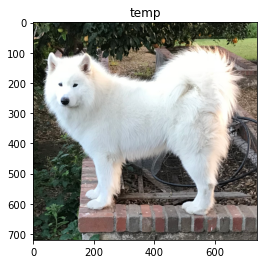

In [59]:
display_mat(img_cv_rgb)

`cvtColor` also allows us to convert images to other colour spaces.

```
cv2.COLOR_GRAY2BGR
cv2.COLOR_RGB2BGR
cv2.COLOR_BGR2RGB
cv2.COLOR_BGR2YUV
cv2.COLOR_YUV2BGR
cv2.COLOR_BGR2Luv
cv2.COLOR_Luv2BGR
```

In [73]:
img_cv_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
print("shape: ", img_cv_gray.shape)

shape:  (720, 740)


Notice it is single channel only.

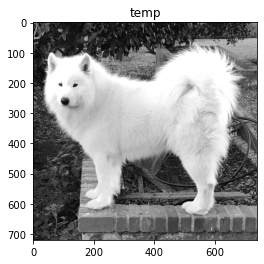

In [83]:
display_mat(img_cv_gray, cmap='gray')

We can convert it back into a 3D array:

(720, 740, 3)


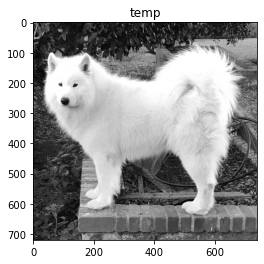

In [106]:
# Using cvtColor
img_cv_gray_3d = cv2.cvtColor(img_cv_gray, cv2.COLOR_GRAY2BGR)
print(img_cv_gray_3d.shape)
display_mat(img_cv_gray_3d)

In [ ]:
# Or by duplicating 1 channel into 3
img_cv_gray_3d_merge = cv2.merge([img_cv_gray, img_cv_gray, img_cv_gray])

# Adding Text and Lines to an Image

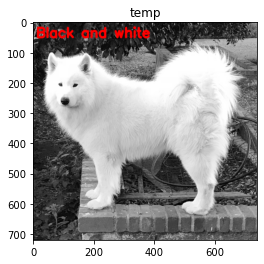

In [107]:
img_cv_gray_3d
cv2.putText(img_cv_gray_3d, 
            'Black and white', # text
            (10,50), # position x,y from top left
            cv2.FONT_HERSHEY_SIMPLEX, # font
            1.5, # font scale
            (255,0,0), # colour
            5, # font line width
            cv2.LINE_AA # line type
           )
display_mat(img_cv_gray_3d)

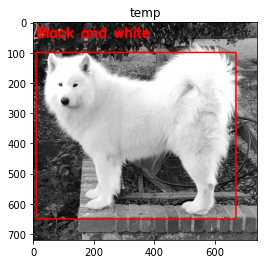

In [108]:
cv2.rectangle(img_cv_gray_3d,
              (10, 100), #x1, y1 Topleft
              (670,650), # x2,y2 bottom right
              (255,0,0), # colour
              3, # thickness
             )
display_mat(img_cv_gray_3d)

# Writing Image to File

In [109]:
cv2.imwrite('test.jpg', img_cv_gray_3d)

True

__Question__

After writing the image to a file, take a look at the file.

Anything wrong with it?

If yes, fix the above line that writes the image to a file to produce the right output.